### Visualizing the Data Set

In [15]:
# Importing relevant packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
filepath = "movie-reviews-vectorized-data.csv"
df = pd.read_csv(filepath) # reading in data

df.head() # diplaying first 5 rows

,Unnamed: 0,file_ID,raw_text,Good,ability,able,absolute,absolutely,accent,accept,...,yeah,year,years,yes,york,young,younger,zero,zombie,zombies
0,0,neg/1821_4.txt,Working with one of the best Shakespeare sourc...,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,neg/10402_1.txt,"Well...tremors I, the original started off in ...",False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,neg/1062_4.txt,Ouch! This one was a bit painful to sit throug...,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,neg/9056_1.txt,"I've seen some crappy movies in my life, but t...",False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,neg/5392_3.txt,"""Carriers"" follows the exploits of two guys an...",False,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
# Removing the Unnamed: 0 column, file_ID, and raw_text columns
# Renaming the "Good" column to "is_good"

df = df.drop(["Unnamed: 0", "file_ID", "raw_text"], axis=1)
df = df.rename(columns={"Good": "is_good"})
df.head() # checking data

,is_good,ability,able,absolute,absolutely,accent,accept,accident,accidentally,according,...,yeah,year,years,yes,york,young,younger,zero,zombie,zombies
0,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,False,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
# new data frame
words = pd.DataFrame()

# dropping the target column
temp = df.drop("is_good", axis=1)
# including a list of words
words["vocab"] = temp.columns

words.head()

,vocab
0,ability
1,able
2,absolute
3,absolutely
4,accent


In [19]:
# number of words (frequency)
num_words = np.array([])

for word in df.columns: 
    if word == "is_good":
        continue
    else:
        num_words = np.append(num_words, np.sum(df[word]))

In [20]:
# Adding frequency of words to data frame
words['frequency'] = num_words
# sorting words - most frequent to least frequent
words = words.sort_values(by=['frequency'], ascending=False)
words.head()

,vocab,frequency
826,like,1578.0
766,just,1442.0
613,good,1128.0
1363,story,984.0
1453,time,954.0


In [33]:
# Top 20 most frequent words
freq = words[:20]
freq

,vocab,frequency
826,like,1578.0
766,just,1442.0
613,good,1128.0
1363,story,984.0
1453,time,954.0
1152,really,925.0
623,great,784.0
106,bad,737.0
1033,people,735.0
875,make,701.0


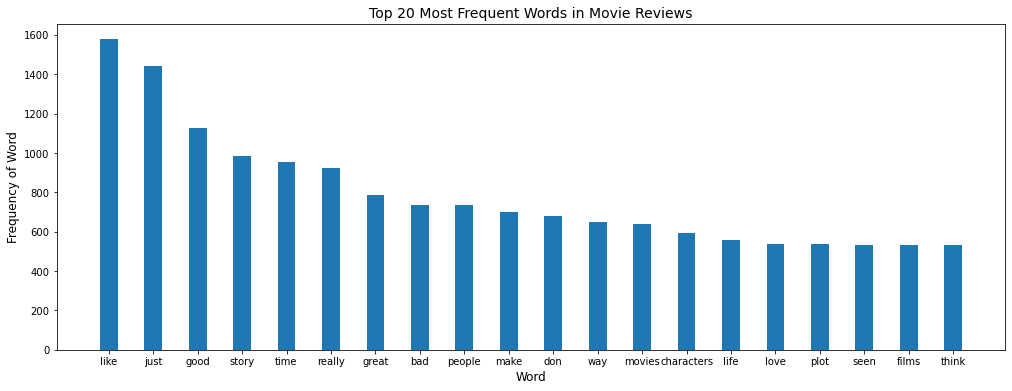

In [12]:
plt.figure(figsize=(17, 6))
plt.bar(freq["vocab"], freq["frequency"], width=0.4)
plt.title("Top 20 Most Frequent Words in Movie Reviews", fontsize=14)
plt.ylabel("Frequency of Word", fontsize=12)
plt.xlabel("Word", fontsize=12)
plt.savefig('viz-of-dataset.png')

### Correlation Coefficient Plot

In [34]:
df

,is_good,ability,able,absolute,absolutely,accent,accept,accident,accidentally,according,...,yeah,year,years,yes,york,young,younger,zero,zombie,zombies
0,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,False,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,True,0,2,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1996,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1998,True,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
popular = list(freq["vocab"]) # extracting only the most frequent words

In [36]:
# determining all other words that need to be dropped
to_drop = []
for word in df.columns:
    if word not in popular:
        to_drop.append(word)
    else:
        continue

In [37]:
len(to_drop) # should be 1630-20 = 1610

1610

In [38]:
corr = df.drop(to_drop, axis=1) # new dataframe of popular words
corr

,bad,characters,don,films,good,great,just,life,like,love,make,movies,people,plot,really,seen,story,think,time,way
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,2,2,1,0,1,0,0,1,0,0
2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,2,2,0,0,0,2,0,0,2,1,0,0,0,0
4,0,1,1,0,0,0,0,0,2,0,0,0,2,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
1996,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1997,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0
1998,0,1,1,0,1,1,1,0,3,1,0,0,2,0,3,1,2,0,1,0


In [39]:
# Computing the correlation matrix
corr_matrix = corr.corr()

corr_matrix.shape

(20, 20)

In [50]:
# rounding correlation coefficients to 3 decimal places
np.round(corr_matrix, 3)

,bad,characters,don,films,good,great,just,life,like,love,make,movies,people,plot,really,seen,story,think,time,way
bad,1.000,0.078,0.123,0.056,0.149,-0.034,0.163,-0.027,0.149,0.015,0.101,0.140,0.036,0.105,0.141,0.100,0.001,0.062,0.059,0.102
characters,0.078,1.000,0.123,0.083,0.138,0.073,0.169,0.071,0.159,0.067,0.090,0.108,0.109,0.150,0.112,0.078,0.125,0.160,0.178,0.117
don,0.123,0.123,1.000,0.042,0.105,0.022,0.237,0.003,0.200,0.099,0.120,0.056,0.167,0.097,0.149,0.050,0.012,0.222,0.066,0.133
films,0.056,0.083,0.042,1.000,0.085,0.075,0.162,0.047,0.141,0.081,0.103,0.033,0.018,0.057,0.078,0.126,0.162,0.094,0.076,0.150
good,0.149,0.138,0.105,0.085,1.000,0.122,0.172,0.052,0.167,0.064,0.105,0.090,0.078,0.082,0.226,0.074,0.154,0.136,0.102,0.095
great,-0.034,0.073,0.022,0.075,0.122,1.000,0.090,0.042,0.094,0.116,0.032,0.094,0.011,0.058,0.123,0.042,0.099,0.085,0.092,0.083
just,0.163,0.169,0.237,0.162,0.172,0.090,1.000,0.067,0.298,0.115,0.160,0.142,0.159,0.150,0.248,0.138,0.145,0.245,0.179,0.214
life,-0.027,0.071,0.003,0.047,0.052,0.042,0.067,1.000,0.065,0.110,0.061,0.064,0.120,-0.015,0.067,0.019,0.121,0.057,0.129,0.115
like,0.149,0.159,0.200,0.141,0.167,0.094,0.298,0.065,1.000,0.108,0.232,0.212,0.169,0.091,0.204,0.086,0.107,0.210,0.199,0.170
love,0.015,0.067,0.099,0.081,0.064,0.116,0.115,0.110,0.108,1.000,0.066,0.027,0.033,-0.029,0.065,0.001,0.166,0.079,0.163,0.049


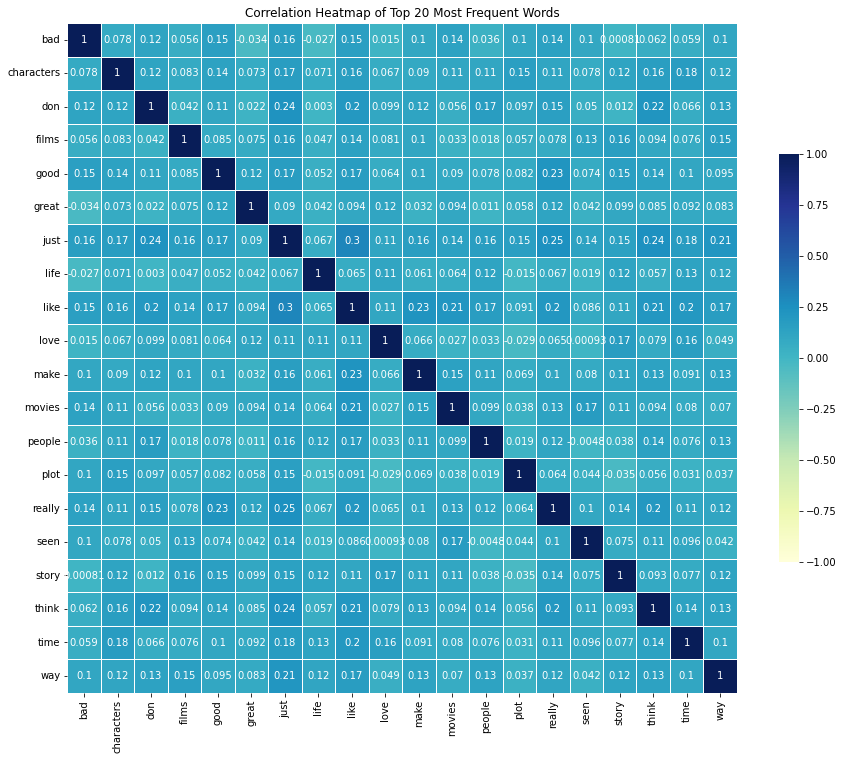

In [53]:
# Plotting correlation heatmap!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = "YlGnBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap = cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap of Top 20 Most Frequent Words")
plt.savefig("correlation.png")